In [1]:
import numpy as np
import pickle

In [2]:
with open('choicesRBFKernel.pickle', 'rb') as f:
    allChoices = pickle.load(f)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
scale = scale[:12]

In [4]:
(gamma,regscale,scores) = allChoices[0]
regscale

array([  1.00000000e-02,   5.27263158e+00,   1.05352632e+01,
         1.57978947e+01,   2.10605263e+01,   2.63231579e+01,
         3.15857895e+01,   3.68484211e+01,   4.21110526e+01,
         4.73736842e+01,   5.26363158e+01,   5.78989474e+01,
         6.31615789e+01,   6.84242105e+01,   7.36868421e+01,
         7.89494737e+01,   8.42121053e+01,   8.94747368e+01,
         9.47373684e+01,   1.00000000e+02])

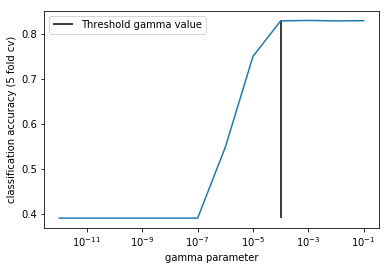

In [5]:
relevantScores= np.max(scores,1)

plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)

ax.plot(scale,relevantScores)
ax.vlines(gamma,min(relevantScores),relevantScores[9],label ='Threshold gamma value')
ax.set_xscale("log")
ax.set_xlabel('gamma parameter')
ax.set_ylabel('classification accuracy (5 fold cv)')
plt.legend()
plt.show()
fig.savefig('gamma_para.pdf')

In [6]:
regScores = scores[8]
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
lim1 = np.argmin(regscale) 
lim2 = np.argmax(regscale)

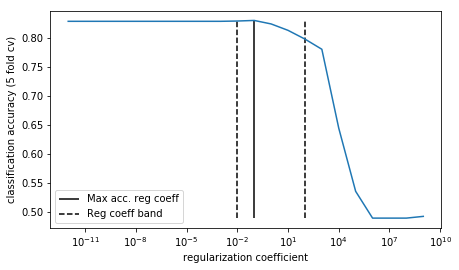

In [7]:
plt.clf()
fig =plt.figure(figsize = (7,4))
ax = fig.add_subplot(111)
threshold = np.argmax(regScores)
ax.vlines(scale[threshold],min(regScores),regScores[threshold],label ='Max acc. reg coeff')
ax.vlines(regscale[lim1],min(regScores),regScores[threshold],linestyles= '--',label = 'Reg coeff band')
ax.vlines(regscale[lim2],min(regScores),regScores[threshold],linestyles='--')


ax.plot(scale[:-3],regScores[:-3])
ax.set_xscale("log")
ax.set_xlabel('regularization coefficient')
ax.set_ylabel('classification accuracy (5 fold cv)')
plt.legend()
plt.show()
fig.savefig('reg_coeff.pdf')

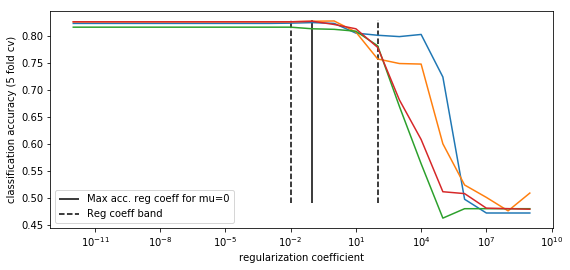

In [10]:
plt.clf()
fig =plt.figure(figsize = (9,4))
ax = fig.add_subplot(111)
threshold = np.argmax(regScores)
for choices in allChoices[3:7]:
    (gamma1,regscale1,scores) = choices
    ax.plot(scale[:-3],scores[8][:-3])
ax.set_xscale("log")
ax.set_xlabel('regularization coefficient')
ax.set_ylabel('classification accuracy (5 fold cv)')
ax.vlines(scale[threshold],min(regScores),regScores[threshold],label ='Max acc. reg coeff for mu=0')
ax.vlines(regscale[lim1],min(regScores),regScores[threshold],linestyles= '--',label = 'Reg coeff band')
ax.vlines(regscale[lim2],min(regScores),regScores[threshold],linestyles='--')
plt.legend()
plt.show()
fig.savefig('multi_mu_reg.pdf')

In [11]:
#Also means if you want a faster estimation and a dont mind being slightly less precise, you can do a one time calculation and use fixed classifier parameters.
# In that case, only run kernel classification the number of points that are being estimated.

In [12]:
#I have for my experiments used made a one time selection of lernel parameter values and narrow regscale bounds using typical mu value,
#and made a choice of 20 regularizers for each classification, on the narrow regscale. - Using a single validation set.

In [13]:
gamma

0.0001

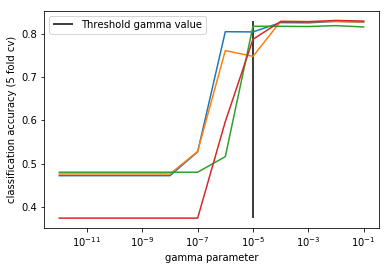

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
scale = scale[:12]
mini = 10000
for choices in allChoices[3:7]:
    (gamma,regscale,scores) = choices
    ax.plot(scale,np.max(scores,1))
    if(mini > np.min(np.max(scores,1))):
        mini =np.min(np.max(scores,1))
ax.vlines(gamma,mini,relevantScores[8],label ='Threshold gamma value')

ax.set_xscale("log")
ax.set_xlabel('gamma parameter')
ax.set_ylabel('classification accuracy (5 fold cv)')
plt.legend()
plt.show()
fig.savefig('multi_mu_gamma.pdf')

In [41]:
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])

In [15]:
(gamma,regscale,scores) = allChoices[0]

In [19]:
import Utilities.kernelClassifier as kC
import Utilities.hyperparameterChoice as hC
from Utilities.ExpModels import  GaussianModel
from Utilities.kernels import kernelLinear, kernelPoly, kernelRBF


model = model = GaussianModel(3,-20,20) 
kRBF =lambda X1,X2: kernelRBF(X1,X2,gamma) #Any setting is fine.
clf = kC.KernelClassifier(kRBF)
number = np.array([50,75])
scores = np.zeros(len(number))

In [20]:

for i in range(len(number)): 
    print('############### Calculating for n value = ',number[i],' #####################')
    # Get  classification setup
    (X_vals,y_vals) = hC.returnSetup(np.array([[0]]), model, number[i])
    scores[i] = hC.classify(X_vals,y_vals,clf,scale)[0]

############### Calculating for n value =  50  #####################
Training for c value:  1e-12
Training kernel logistic regression model...

COMPLETED. Running Time: 0.276 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.259 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.235 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.252 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.234 seconds 
Training for c value:  1e-11
Training kernel logistic regression model...

COMPLETED. Running Time: 0.259 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.247 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.236 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.251 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.220 seconds 
Training for 

COMPLETED. Running Time: 0.149 seconds 
Training for c value:  1000000.0
Training kernel logistic regression model...

COMPLETED. Running Time: 0.142 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.136 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.069 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.140 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.125 seconds 
Training for c value:  10000000.0
Training kernel logistic regression model...

COMPLETED. Running Time: 0.159 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.143 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.020 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.150 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.157 seconds 
Training for c value:  100000000.

COMPLETED. Running Time: 0.592 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.897 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.572 seconds 
Training for c value:  0.1
Training kernel logistic regression model...

COMPLETED. Running Time: 0.907 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.687 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.931 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.840 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.910 seconds 
Training for c value:  1.0
Training kernel logistic regression model...

COMPLETED. Running Time: 0.658 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.688 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 0.853 seconds 
Training kernel logistic regression model...



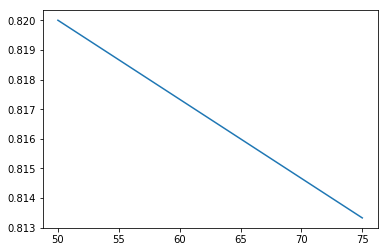

In [21]:
plt.clf()
plt.plot(number,scores)
plt.show()

In [23]:
with open('numbers.pickle', 'rb') as f:
    numbers = pickle.load(f)

In [29]:
newrel = np.hstack([scores,relNum])

In [25]:
relNum = np.max(numbers,1)

In [6]:
import matplotlib.pyplot as plt


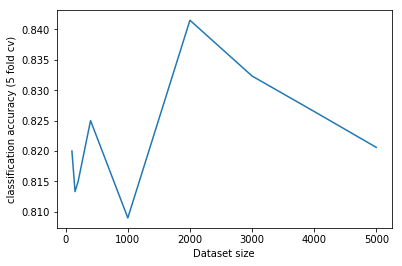

In [36]:
number = np.array([100,150,200,400,1000,2000,3000,4000,5000])
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
ax.plot(number,newrel)
ax.set_xlabel('Dataset size')
ax.set_ylabel('classification accuracy (5 fold cv)')
plt.show()
fig.savefig('datasetSize.pdf')

In [8]:
relNum

array([ 0.815     ,  0.825     ,  0.809     ,  0.8415    ,  0.83233333,
        0.8265    ,  0.8206    ])

In [1]:
# Able to achive within 4percent changes for varying dataset size.
#

In [2]:
class check:
    def __init__(self,x):
        self.x = x
    def change(self):
        self.x +=1

In [3]:
obj=check(5)

In [4]:
def func(object):
    object.change()

In [5]:
func(obj)

In [6]:
obj.x

6

In [2]:
with open('numbersScores.pickle', 'rb') as f:
    num = pickle.load(f)

In [3]:
vals=[]
for n in num:
    (a,b,c)=n
    vals.append(c)

In [4]:
num

[(1.0000000000000001e-05, 0.0001, 0.8234),
 (1.0000000000000001e-05, 0.0001, 0.8276),
 (0.0001, 9.9999999999999998e-13, 0.8311999999999999),
 (1.0000000000000001e-05, 9.9999999999999998e-13, 0.8304),
 (0.0001, 9.9999999999999998e-13, 0.8326),
 (0.0001, 0.10000000000000001, 0.831),
 (0.0001, 9.9999999999999998e-13, 0.8328)]

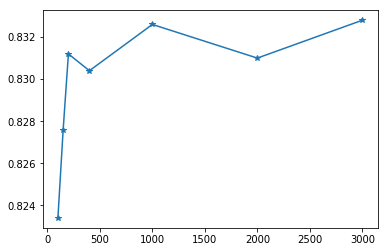

In [6]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot([100,150,200,400,1000,2000,3000],vals,'-*')
plt.show()

In [18]:
np.linspace(-20,20,10)[3:7]

array([-6.66666667, -2.22222222,  2.22222222,  6.66666667])

In [7]:
#Selection of threshold value for the polynomial kernel is 

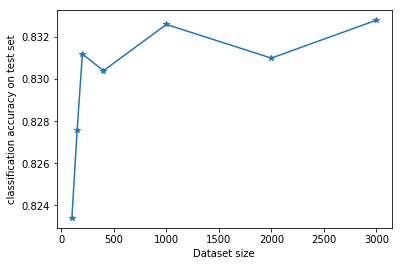

In [11]:
number = np.array([100,150,200,400,1000,2000,3000])
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
ax.plot(number,vals,'-*')
ax.set_xlabel('Dataset size')
ax.set_ylabel('classification accuracy on test set')
plt.show()
fig.savefig('datasetSize.pdf')